# Data visualization with matplotlib

In [1]:
from IPython.display import HTML
HTML('<iframe src="https://player.vimeo.com/video/278480149" width="800" height="600" frameborder="0" allow="autoplay; fullscreen" allowfullscreen></iframe>')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# What are we going to learn today?
***

- Python Data Visualization Libraries
    - Matplotlib
        - Matplotlib basics
   
        - Histograms
        - Box Plots
        - Scatter Plots
<br/><br/>

- Plot Types 
<br/><br/>

- Plot Customization

<img src="../images/icon/Technical-Stuff.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## Technical Details
***

In [1]:
# Import the required Libraries
from matplotlib import pyplot as plt
import numpy as np

# Set it up to work with Jupyter Notebook
# (this is a Jupyter command, not Python code)
%matplotlib inline

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 1
***
### Instructions
* Create a graph for `y = cos(x)`. X values should be from 0 to 10, incrementing in steps of 0.1


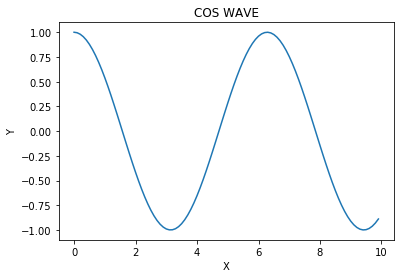

In [13]:
def cos_wave():
    x=np.arange(10,step=0.1)
    y=np.cos(x)
    plt.plot(x,y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('COS WAVE')
    plt.show()

cos_wave()


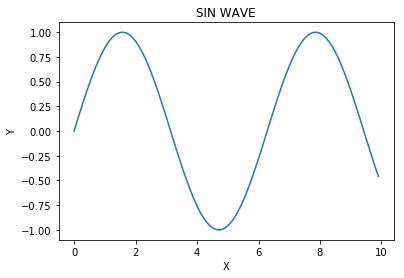

In [12]:
def sin_wave():
    x=np.arange(10,step=0.1)
    y=np.sin(x)
    plt.plot(x,y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('SIN WAVE')
    plt.show()
sin_wave()

# Let's do this with the Weather data!
***

Quick Refresher:

The Weather Dataset is a time-series data set with per-hour information about the weather conditions at a particular location. It records Temperature, Dew Point Temperature, Relative Humidity, Wind Speed, Visibility, Pressure, and Conditions.


### Read the data set

In [29]:
# Data Introduction
import pandas as pd
#date object call karne ke liye parse_date true 
weather_df = pd.read_csv('../data/weather_2012.csv',  parse_dates=True, index_col='Date/Time') 
weather_df.head(5)

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## How did the temperature vary amongst the months of the year?
***

Since we want to compare amongst months, we need one value for each month. Let's pick the mean for doing this.

Generate a line chart that visualizes the temperature readings in the month of January:
* x-values should be the values should be the months.
* y-values should be the mean values in the Temp (C) column per month.

Display the plot.

### Creating the data in the required format

In [30]:
#capture data for only months
monthly_data = weather_df.groupby( weather_df.index.month).mean()
monthly_data.head(12)

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa)
Date/Time,,,,,,
1,-7.371505,-12.294758,68.383065,18.108871,22.100269,101.005349
2,-4.225000,-9.221695,68.956897,14.837644,25.182184,101.142414
3,3.121237,-3.488575,64.862903,14.514785,26.177957,101.335255
4,7.009306,-1.934583,56.150000,17.369444,31.777083,100.716833
5,16.237769,8.080780,61.760753,12.846774,29.418548,101.057164
6,20.134028,11.738056,60.643056,14.681944,32.104167,100.784222
7,22.790054,14.595430,62.017473,11.887097,33.655108,100.828333
8,22.279301,15.644758,67.943548,13.931452,30.192608,100.927097
9,16.484444,10.757917,71.165278,14.108333,30.603472,101.087903


In [32]:
x_series = monthly_data.index
y_series = monthly_data['Temp (C)']
y_series

Date/Time
1     -7.371505
2     -4.225000
3      3.121237
4      7.009306
5     16.237769
6     20.134028
7     22.790054
8     22.279301
9     16.484444
10    10.954973
11     0.931389
12    -3.306317
Name: Temp (C), dtype: float64

### Plotting: Step 1

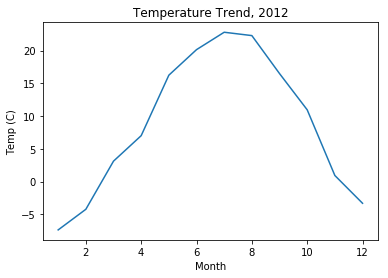

In [33]:
plt.plot(x_series, y_series)

plt.title('Temperature Trend, 2012')
plt.xlabel('Month')
plt.ylabel('Temp (C)')
plt.show()


### Plotting: Step 2

The chart we plotted is decent, but we aren't done yet. The X axis is labelled correctly ("Month"), but the values themselves are 2, 4, etc, instead of January, February, etc.

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 2
***
### Instructions
* The variable `calender_months` is already defined for you. Assign that variable to the variable `x`
* Generate the same plot as above,but this time the values of the "Month" should be January, February etc instead of 1,2,3,etc.

In [37]:
# First, get calendar month names
import calendar
calendar_months = calendar.month_name[1:]

print(calendar_months)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


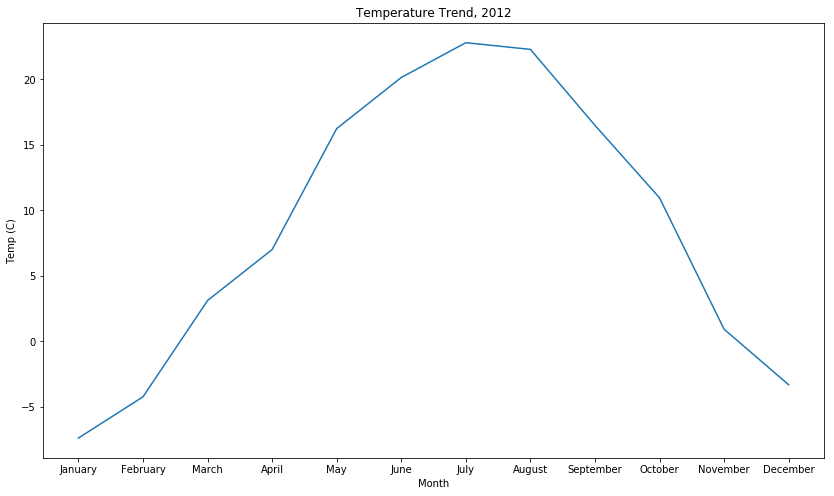

In [44]:
# now we have the names, let's use them instead
''' Your code goes here'''
x = calendar_months
y = monthly_data['Temp (C)']
plt.figure(figsize = (14,8))
plt.plot(x, y)
plt.title('Temperature Trend, 2012')
plt.xlabel('Month')
plt.ylabel('Temp (C)')
plt.show()

### Plotting: Step 3

Almost done, but not quite. We need the X-axis labels to be a bit more legible. Let's rotate them a bit.

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 3
***
### Instructions
* Generate the same graph as above, but with the X-axis labels rotated, so that they are legible.

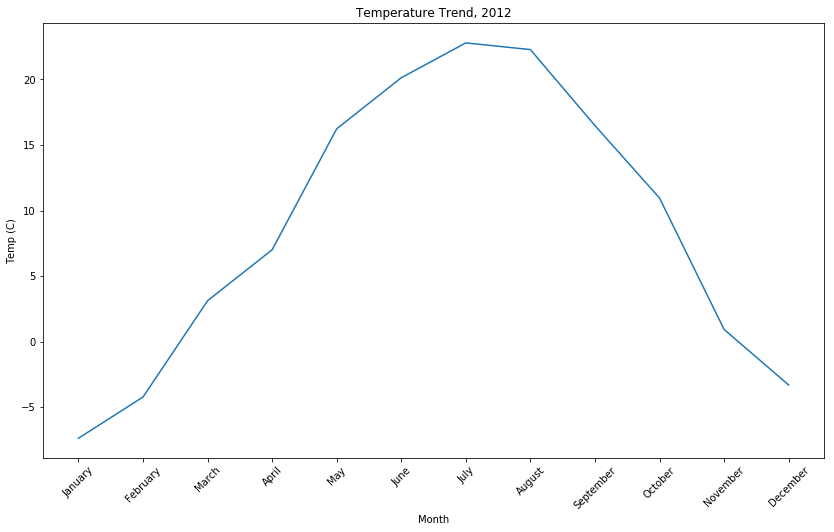

In [43]:
'''Your code goes here'''
''' Your code goes here'''
x = calendar_months
y = monthly_data['Temp (C)']
plt.figure(figsize = (14,8))
plt.plot(x, y)
plt.title('Temperature Trend, 2012')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Temp (C)')
plt.show()

# Other Plot Types
***

The chart we have so far worked with is called a Line Chart. There are other types of plots. Some important examples are:
- Histograms
- Box Plots
- Scatter Plots

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 4
***
### Instructions
* Define the function `hist_plot`
* Find the distribution of values in the Wind Speed column using `plt.hist()`
* Remember to label x axis as `Wind Spd (km/h)` and y label as `Frequency`

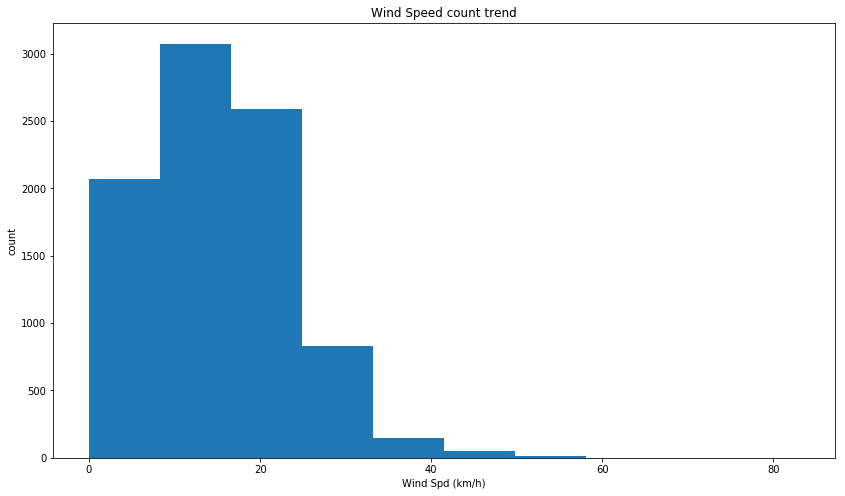

In [49]:
def hist_plot():
    plt.figure(figsize = (14,8))
    plt.hist(weather_df['Wind Spd (km/h)']) #returns frequency of Wind Spd (km/h) values
    plt.title('Distribution of Wind Speed')
    plt.xlabel('Wind Spd (km/h)')
    plt.ylabel('count')
hist_plot()   

(array([ 309.,    2.,  474., 1286.,  830.,  791.,  735.,  719.,  666.,
         616.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

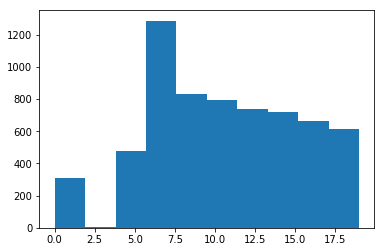

In [52]:
plt.hist(weather_df[weather_df['Wind Spd (km/h)'] < 20]['Wind Spd (km/h)'])

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 5
***
### Instructions
* Define a function `box_plot`
* Draw a boxplot for wind speed using `plt.boxplot()`

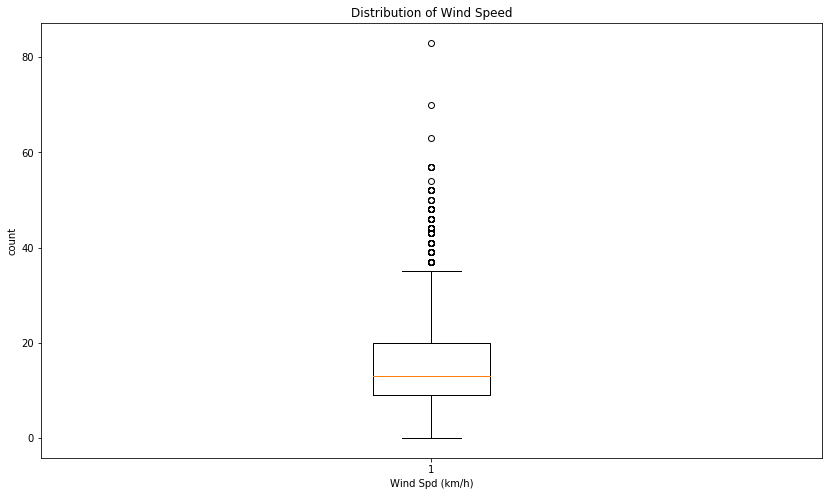

In [51]:
def box_plot():
    plt.figure(figsize = (14,8))
    plt.boxplot(weather_df['Wind Spd (km/h)']) #returns frequency of Wind Spd (km/h) values
    plt.title('Distribution of Wind Speed')
    plt.xlabel('Wind Spd (km/h)')
    plt.ylabel('count')
box_plot()   

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 6
***
### Instructions
* Are the temperature and pressure correlated, according to the data in the month of January? Look at it by generating a scatter plot
* The data for the month of january is defined for you in the variable `jan_df`
* Define a function `scatter_plot`
* Plot the graph using `plt.scatter()` by passing parameter `x=jan_df['Temp (C)']`,`y=jan_df['Stn Press (kPa)']`
* Remember to label x axis as `Temp (C)` , y axis as `Pressure` and title as `Corelation between Temperature and Pressure for January`

In [53]:
jan_df = weather_df['2012-01']


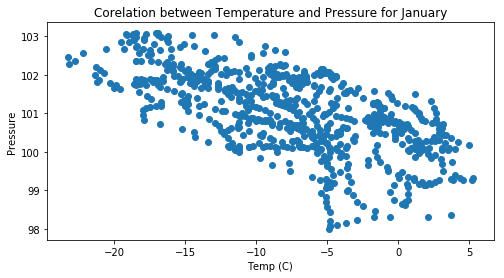

In [57]:
def scatter_plot():
    plt.figure(figsize = (8,4))
    x = jan_df['Temp (C)'],
    y = jan_df['Stn Press (kPa)']
    plt.scatter(x,y) #returns frequency of Wind Spd (km/h) values
    plt.title('Corelation between Temperature and Pressure for January')
    plt.xlabel('Temp (C)')
    plt.ylabel('Pressure')
scatter_plot() 

<img src="../images/icon/Technical-Stuff.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

# Plot Customizations
***

Matplotlib being a low level library, provides a lot of ways to customize your plots.

Some examples include:
- Configuring the line (color, width, ticks, etc)
- Configuring the axes (setting limits, layout, etc.)
- Figure and Sub Plots: Multiple plots on one canvas
- Configuring the figure size
- Adding legends, etc.

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 7
***
### Instructions
* Create a figure with four subplots, and plot `y = x ** 2` on the first and last plots
* Make the color red in the first subplot, and a green dashed line in the last

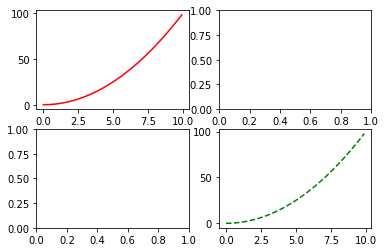

In [80]:
def sub_plots_example():
    x = np.arange(0,10,0.1)
    fig,ax = plt.subplots(nrows = 2, ncols = 2)
    plt.subplot(2,2,1)
    plt.plot(x, x**2, c='r')
    plt.subplot(2,2,4)
    plt.plot(x, x**2, 'g--' )
    
sub_plots_example()

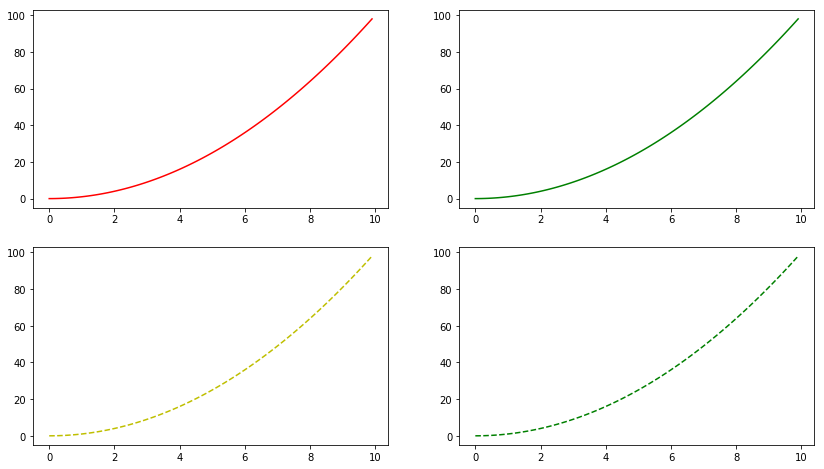

In [7]:
import numpy as np
from matplotlib import pyplot as plt
def sub_plots_example():
    x = np.arange(0,10,0.1)
    plt.figure(figsize = (14,8))
    plt.subplot(2,2,1)
    plt.plot(x, x**2, 'r')
    plt.subplot(2,2,2)
    plt.plot(x, x**2, c='g')
    plt.subplot(2,2,3)
    plt.plot(x, x**2, 'y--')
    plt.subplot(2,2,4)
    plt.plot(x, x**2, 'g--')
    
sub_plots_example()

## Quiz

Q1. What's another reason visualization is important?

```python
1. We just have too much data. For example, a telescope used to just give a view of the skies. But now telescopes collect terabytes and petabytes of data that needs analysis.

2. If you have continuous data, use a continuous charting format, such as a line chart. If you have discrete data, use a discrete data display format, such as a bar graph.

3. The are visual aids for our brains which don't remember well. It's "things" from the external world that make us smart and visualizations serve as cues to activate this.

4. Visual thinking consists of a series of acts of attention, driving eye movements and tuning our pattern-finding circuits. These acts of attention are called visual queries.

```

Q2. What are the four main functions of data visualization?

```python
1. Repeating a tracing operation will take less cognitive effort, and require fewer fixations, than finding it in the first place. A hallmark of visual thinking is that it is often easier to redo some cognitive operation than to remember it.

2. The brain COMBINES both bottom-up and top-down information. Therefore, we have to pay attention to C.R.A.P. principles (contrast, repetition, alignment, and proximity) but we also have to keep in mind 'what will the user pay attention to'?

3. Studies of shown that 3-D is a no-no it is difficult to use and interpret, especially compared to 2-D. Just don't use 3-D (except if you have a spatial relationship to show such as air flow over an aircraft wing...)

4. (1) To record information / have a graphical record of something; (2) to analyze data, reveal trends and patterns, and support reasoning; (3) confirm a hypothesis about the data; (4) communicate ideas / persuade / convince / inspire others.
```

Q3. Why are visualizations "generally" more useful than text?

```python
1. Because about half of our brains are wired for perception (seeing) and visualizations take advantage of that. Visualizations allow elements to pop out at us vs. text which gives us something to think about (important point).

2. We use the word attention to describe top-down processes. Top-down processes are driven by the need to accomplish some goal. Th is might be an action, such as reaching out and grasping a teacup or exiting a room.

3. We're in the "revolution of industrial data" and data collection has never been easier--and will continue to get easier. We have RFID sensors, road sensors, live cameras, traffic sensors, chips everywhere and it will only increase.

4. The brain COMBINES both bottom-up and top-down information. Therefore, we have to pay attention to C.R.A.P. principles (contrast, repetition, alignment, and proximity) but we also have to keep in mind 'what will the user pay attention to'?

```
Q4. This bar graph is an example of a data visualization technique. How many categories are represented in this bar graph? 

<img src="../images/graph.jpg"/>

```python
1. 40
 
2. 6
 
3. 0
 
4. 5

```

# Further Reading
***

- Matplotlib documentation: https://matplotlib.org/
- Seaborn documentation: https://seaborn.pydata.org/

# Thank You
***

### Next Session: Intro to ML
For more queries - Reach out to academics@greyatom.com 